
*   In the dynamic world of financial markets, accurate stock price prediction is a valuable tool for traders and investors.
*  Accurate predictions can lead to more informed investment decisions, potentially resulting in higher profits and reduced risks.
# Goal :To create a reliable model that can forecast future stock prices based on historical price data.

**Key Tasks**

***1.Data Preprocessing:***
Load and preprocess the historical stock price data.
Prepare the data for training and testing.

***2.Model Development:***
Build an LSTM-based neural network model for stock price prediction.
Configure the model with an appropriate number of LSTM layers, units, and other hyperparameters.
Train the model using the training dataset.

***3.Evaluation:***
Evaluate the model's performance using relevant evaluation metrics.
Calculate the Root Mean Square Error (RMSE) and potentially other metrics.


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing the necessary modules

In [30]:
import pandas as pd  # data manipulation and analysis.
import numpy as np  #numerical operations.
from numpy import concatenate  # for array operations.
from math import sqrt  # for square root calculations.
import matplotlib.pyplot as plt  # data visualization.
from matplotlib import pyplot  # plotting.
import seaborn as sns  # enhanced data visualization.
sns.set_style('whitegrid')  # plots.
plt.style.use("fivethirtyeight")  # plots.
%matplotlib inline

In [31]:
import nltk  # for natural language processing.
import re  # for regular expressions.
from nltk.corpus import stopwords  #Text preprocessing.
nltk.download('stopwords')  # Download the stopwords dataset.
nltk.download('vader_lexicon')  # sentiment analysis.
from textblob import TextBlob  # text processing and sentiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # VADER sentiment analysis from nltk.
from nltk.stem.porter import PorterStemmer  # text stemming.
ps = PorterStemmer()  # Porter Stemmer.
from sklearn.metrics import mean_squared_error  # mean squared error metrics for evaluation
from sklearn.model_selection import train_test_split  #  train_test_split for data splitting.
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler for data scaling.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#Importing data

Importing historical price data

In [32]:
df_prices = pd.read_csv('/content/drive/MyDrive/Stock-Market-Prediction-using-Numerical-and-Textual-Analysis-main/data/BSESN.csv')

Importing textual data

In [33]:
cols = ['Date','Category','News']
df_news = pd.read_csv('/content/drive/MyDrive/Stock-Market-Prediction-using-Numerical-and-Textual-Analysis-main/data/india-news-headlines.csv', names = cols)

#Data Understanding

In [34]:
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,41883.089844,41994.261719,41770.898438,41952.628906,41952.628906,14100.0
1,2020-01-15,41969.859375,41969.859375,41648.109375,41872.730469,41872.730469,6100.0
2,2020-01-16,41924.738281,42059.449219,41812.281250,41932.558594,41932.558594,6600.0
3,2020-01-17,41929.019531,42063.929688,41850.289063,41945.371094,41945.371094,9500.0
4,2020-01-20,42263.000000,42273.871094,41503.371094,41528.910156,41528.910156,7500.0
...,...,...,...,...,...,...,...
247,2021-01-08,48464.910156,48854.339844,48365.578125,48782.511719,48782.511719,22200.0
248,2021-01-11,49252.308594,49303.789063,48956.378906,49269.320313,49269.320313,21200.0
249,2021-01-12,49228.261719,49569.140625,49079.570313,49517.109375,49517.109375,12700.0
250,2021-01-13,49763.929688,49795.191406,49073.851563,49492.320313,49492.320313,27200.0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_prices, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_prices, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_prices, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_prices, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_prices, *['Open', 'High'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_prices, *['High', 'Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_prices, *['Low', 'Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_prices, *['Close', 'Adj Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_prices, *['Date', 'Open', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_prices, *['Date', 'High', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_prices, *['Date', 'Low', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_prices, *['Date', 'Close', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_prices, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_prices, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_prices, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_prices, *['Close'], **{})
chart

**Date**:Date associated with the financial data points.

**Open**:This is the price at which trading began at the start of the trading session.

**High**: Highest price reached during the trading session on that date.

**Low**: Lowest price reached during the trading session on that date.

**Close**: Closing price of the financial index or stock at the end of the trading session on that date.

**Adj Close**:Adjusted price accounts for factors such as dividends, stock splits, or other corporate actions.

**Volume**: Trading volume for the day is the total number of shares or units traded on that date.

In [35]:
df_news = df_news.dropna(axis = 0, how ='any')
df_news

,Date,Category,News
0,20200101,life-style.events,Happy New Year 2020: Images; Quotes; Wishes; M...
1,20200101,city.bhubaneswar,Bone-clling cold wavecontinues to sweep state
2,20200101,city.hyderabad,T gained 163 sq km forest cover
3,20200101,city.hyderabad,Draft electoral rolls published
4,20200101,city.koc,Invasive species increasing in Kerala's core f...
...,...,...,...
90868,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
90869,20200630,entertainment.ndi.bollywood,apurva asrani calls alia bhatts mother soni ra...
90870,20200630,entertainment.ndi.bollywood,kangana ranaut gets a doll version of herself ...
90871,20200630,entertainment.ndi.bollywood,meezaan jaffrey reminisces s cldhood days with...


**Category**: Indicate the category or topic of the news article.

**News**: Headline of the news article or event.

#Cleaning and Data Preprocessing

Dropping 0 values, and the Category column as we don't require this for our analysis.

In [36]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')# Converting 'Date' columns from both our dataframes to type datetime
df_news

,Date,News
1,2020-01-01,Bone-clling cold wavecontinues to sweep state
2,2020-01-01,T gained 163 sq km forest cover
3,2020-01-01,Draft electoral rolls published
4,2020-01-01,Invasive species increasing in Kerala's core f...
5,2020-01-01,Onion price in Hyd dips to Rs 90/kg
...,...,...
90868,2020-06-30,why tiktok removed 1 65 crore videos in india
90869,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
90870,2020-06-30,kangana ranaut gets a doll version of herself ...
90871,2020-06-30,meezaan jaffrey reminisces s cldhood days with...


Converting the values in the "Date" column of the DataFrame df_prices into datetime objects, allowing for easier date-related operations.

In [37]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,41883.089844,41994.261719,41770.898438,41952.628906,41952.628906,14100.0
1,2020-01-15,41969.859375,41969.859375,41648.109375,41872.730469,41872.730469,6100.0
2,2020-01-16,41924.738281,42059.449219,41812.281250,41932.558594,41932.558594,6600.0
3,2020-01-17,41929.019531,42063.929688,41850.289063,41945.371094,41945.371094,9500.0
4,2020-01-20,42263.000000,42273.871094,41503.371094,41528.910156,41528.910156,7500.0
...,...,...,...,...,...,...,...
247,2021-01-08,48464.910156,48854.339844,48365.578125,48782.511719,48782.511719,22200.0
248,2021-01-11,49252.308594,49303.789063,48956.378906,49269.320313,49269.320313,21200.0
249,2021-01-12,49228.261719,49569.140625,49079.570313,49517.109375,49517.109375,12700.0
250,2021-01-13,49763.929688,49795.191406,49073.851563,49492.320313,49492.320313,27200.0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_prices, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_prices, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_prices, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_prices, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_prices, *['Open', 'High'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_prices, *['High', 'Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_prices, *['Low', 'Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df_prices, *['Close', 'Adj Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_prices, *['Date', 'Open', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_prices, *['Date', 'High', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_prices, *['Date', 'Low', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_prices, *['Date', 'Close', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_prices, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_prices, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_prices, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_prices, *['Close'], **{})
chart

Combining and aggregating news articles with the same date, removing duplicates, and reseting the DataFrame index, resulting in a DataFrame where each unique date corresponds to a consolidated set of news articles for that date.

In [38]:
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x))
df_news = df_news.drop_duplicates()
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2020-01-01,Bone-clling cold wavecontinues to sweep state ...
1,2020-01-02,Horoscope Today; 02 January 2020: Read predict...
2,2020-01-03,Bank Holidays in 2020 Mazya Navryac Bayko upda...
3,2020-01-04,Mamta Mohandas plays a nurse in Lalbagh Tolly ...
4,2020-01-05,Homing in on 2020 Beauty in blue Live it up in...
...,...,...
177,2020-06-26,Containment zone residents slam gh prices char...
178,2020-06-27,like me i wont let you have a toxic relationsp...
179,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
180,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


#Text Processing

Text preprocessing on the "News" column, including removing non-alphabetical characters, converting to lowercase, tokenizing, stemming, and removing stopwords to prepare the text for analysis.

In [39]:
c = []
for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    print(i)
    news=' '.join(news)
    c.append(news)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181


Updating the "News" column in df_news with the preprocessed and cleaned news text.

In [40]:
df_news['News'] = pd.Series(c)
df_news

<ipython-input-40-7ccdfe4c772a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['News'] = pd.Series(c)


,Date,News
0,2020-01-01,bone clling cold wavecontinu sweep state gain ...
1,2020-01-02,horoscop today januari read predict ari tauru ...
2,2020-01-03,bank holiday mazya navryac bayko updat januari...
3,2020-01-04,mamta mohanda play nurs lalbagh tolli celeb op...
4,2020-01-05,home beauti blue live diet induc sound sleep y...
...,...,...
177,2020-06-26,contain zone resid slam gh price charg veget v...
178,2020-06-27,like wont let toxic relationsp food major ravi...
179,2020-06-28,atanu ghosh plan rewrit old script make relev ...
180,2020-06-29,hot stylish bikini look katrina kaif anna eden...


#Functions to get the subjectivity and polarity

In [41]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

#Adding subjectivity and polarity columns

In [42]:
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news.head()

<ipython-input-42-ad6d5fa69a01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
<ipython-input-42-ad6d5fa69a01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Polarity'] = df_news['News'].apply(getPolarity)


,Date,News,Subjectivity,Polarity
0,2020-01-01,bone clling cold wavecontinu sweep state gain ...,0.407322,0.040349
1,2020-01-02,horoscop today januari read predict ari tauru ...,0.410638,0.078692
2,2020-01-03,bank holiday mazya navryac bayko updat januari...,0.370711,0.085875
3,2020-01-04,mamta mohanda play nurs lalbagh tolli celeb op...,0.389496,0.126830
4,2020-01-05,home beauti blue live diet induc sound sleep y...,0.350895,0.093071


#Carrying out Sentimental Analysis on the News Headlines:

Adding sentiment score to df_news

In [43]:
sia = SentimentIntensityAnalyzer()
df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

<ipython-input-43-ed6c55698617>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
<ipython-input-43-ed6c55698617>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
<ipython-input-43-ed6c55698617>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-01-01,bone clling cold wavecontinu sweep state gain ...,0.407322,0.040349,-0.9998,0.151,0.777,0.071
1,2020-01-02,horoscop today januari read predict ari tauru ...,0.410638,0.078692,-0.9998,0.155,0.766,0.079
2,2020-01-03,bank holiday mazya navryac bayko updat januari...,0.370711,0.085875,-0.9994,0.122,0.790,0.088
3,2020-01-04,mamta mohanda play nurs lalbagh tolli celeb op...,0.389496,0.126830,-0.9998,0.146,0.780,0.074
4,2020-01-05,home beauti blue live diet induc sound sleep y...,0.350895,0.093071,-0.9999,0.156,0.772,0.072
...,...,...,...,...,...,...,...,...
177,2020-06-26,contain zone resid slam gh price charg veget v...,0.324106,0.066983,-0.9998,0.142,0.790,0.068
178,2020-06-27,like wont let toxic relationsp food major ravi...,0.371791,0.063043,-0.9998,0.139,0.791,0.070
179,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.368076,0.054104,-0.9998,0.135,0.801,0.064
180,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.370906,0.061918,-0.9998,0.130,0.800,0.069


#Merging dataframes, droping columns.

In [44]:
df_merge = pd.merge(df_prices, df_news, how='inner', on='Date')
print(df_prices)
df_merge.drop('Date', axis = 1, inplace=True)
df_merge.drop('News', axis=1, inplace=True)
print(df_merge.columns)
print(len(df_merge))
print(len(df_prices))
print(len(df_news))

          Date          Open          High           Low         Close  \
0   2020-01-14  41883.089844  41994.261719  41770.898438  41952.628906   
1   2020-01-15  41969.859375  41969.859375  41648.109375  41872.730469   
2   2020-01-16  41924.738281  42059.449219  41812.281250  41932.558594   
3   2020-01-17  41929.019531  42063.929688  41850.289063  41945.371094   
4   2020-01-20  42263.000000  42273.871094  41503.371094  41528.910156   
..         ...           ...           ...           ...           ...   
247 2021-01-08  48464.910156  48854.339844  48365.578125  48782.511719   
248 2021-01-11  49252.308594  49303.789063  48956.378906  49269.320313   
249 2021-01-12  49228.261719  49569.140625  49079.570313  49517.109375   
250 2021-01-13  49763.929688  49795.191406  49073.851563  49492.320313   
251 2021-01-14  49432.828125  49663.578125  49182.371094  49584.160156   

        Adj Close   Volume  
0    41952.628906  14100.0  
1    41872.730469   6100.0  
2    41932.558594   6600

#Getting our data series ready for Multivariate Time Series Forecasting

In [45]:
from pandas import DataFrame as df
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df1 = df(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df1.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df1.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

#Scaling our data for optimal performance

In [46]:
values = df_merge.values
print(df_merge)
print(values)
values = values.astype('float32')

             Open          High           Low         Close     Adj Close  \
0    41883.089844  41994.261719  41770.898438  41952.628906  41952.628906   
1    41969.859375  41969.859375  41648.109375  41872.730469  41872.730469   
2    41924.738281  42059.449219  41812.281250  41932.558594  41932.558594   
3    41929.019531  42063.929688  41850.289063  41945.371094  41945.371094   
4    42263.000000  42273.871094  41503.371094  41528.910156  41528.910156   
..            ...           ...           ...           ...           ...   
108  35679.738281  35706.550781  34794.929688  34868.980469  34868.980469   
109  34525.390625  35081.609375  34499.781250  34842.101563  34842.101563   
110  35144.781250  35254.878906  34910.339844  35171.269531  35171.269531   
111  34926.949219  35032.359375  34662.058594  34961.519531  34961.519531   
112  35168.300781  35233.910156  34812.800781  34915.800781  34915.800781   

      Volume  Subjectivity  Polarity  Compound  Negative  Neutral  Positive

#Normalize features

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

#Frame as supervised learning

In [48]:
reframed = series_to_supervised(scaled, 1, 1)

#Drop columns that doesn't make any impact on prediction

In [49]:
reframed.drop(reframed.columns[[12,13,14,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
print(reframed.columns)

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var4(t)'],
      dtype='object')


#Building a LSTM (Long Short Term Memory) Model to predict Stock Prices:

split into train and test sets

In [50]:
values = reframed.values
print((values).shape)
n_train_hours = 90
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

(112, 13)


Split into input and outputs



In [51]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

Reshape input to be 3D [samples, timesteps, features]

In [52]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(90, 1, 12) (90,) (22, 1, 12) (22,)


#Design the network

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [54]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

#Fit network

Epoch 1/50
2/2 - 6s - loss: 0.5460 - val_loss: 0.4812 - 6s/epoch - 3s/step
Epoch 2/50
2/2 - 0s - loss: 0.5169 - val_loss: 0.4520 - 46ms/epoch - 23ms/step
Epoch 3/50
2/2 - 0s - loss: 0.4867 - val_loss: 0.4204 - 44ms/epoch - 22ms/step
Epoch 4/50
2/2 - 0s - loss: 0.4542 - val_loss: 0.3853 - 45ms/epoch - 22ms/step
Epoch 5/50
2/2 - 0s - loss: 0.4180 - val_loss: 0.3455 - 42ms/epoch - 21ms/step
Epoch 6/50
2/2 - 0s - loss: 0.3770 - val_loss: 0.2999 - 42ms/epoch - 21ms/step
Epoch 7/50
2/2 - 0s - loss: 0.3316 - val_loss: 0.2473 - 42ms/epoch - 21ms/step
Epoch 8/50
2/2 - 0s - loss: 0.2812 - val_loss: 0.1866 - 41ms/epoch - 20ms/step
Epoch 9/50
2/2 - 0s - loss: 0.2268 - val_loss: 0.1175 - 42ms/epoch - 21ms/step
Epoch 10/50
2/2 - 0s - loss: 0.1834 - val_loss: 0.0473 - 47ms/epoch - 23ms/step
Epoch 11/50
2/2 - 0s - loss: 0.1597 - val_loss: 0.0250 - 52ms/epoch - 26ms/step
Epoch 12/50
2/2 - 0s - loss: 0.1431 - val_loss: 0.0516 - 43ms/epoch - 21ms/step
Epoch 13/50
2/2 - 0s - loss: 0.1332 - val_loss: 0.070

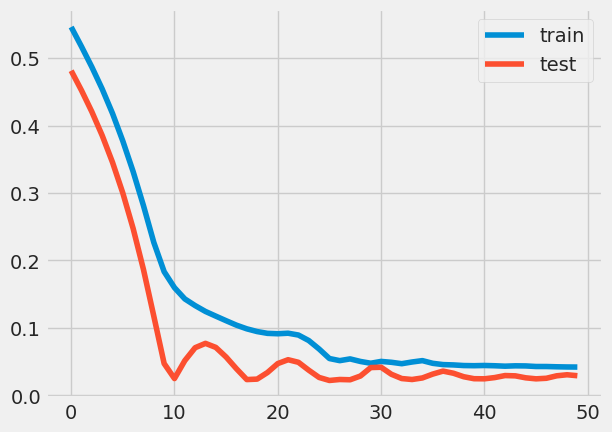

In [55]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

*   Testing the LSTM Model with the test data
*   Calculating RMSE



In [56]:
# make a prediction
print(test_X.shape)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[2]))
print(test_X.shape)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(22, 1, 12)
(22, 1, 12)
1/1 [==============================] - 1s 757ms/step
Test RMSE: 560.309
